<a href="https://colab.research.google.com/github/Ashail33/Masters-work/blob/master/s5c_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Function for s5C clustering 

import numpy as np
import scipy.sparse.linalg as sp_linalg

def normalize_columns(X):
    norms = np.linalg.norm(X, axis=0)
    return X / norms[np.newaxis, :]

def compute_sparse_representation(X, alpha):
    n_samples = X.shape[1]
    A = np.zeros((n_samples, n_samples))
    
    for i in range(n_samples):
        x_i = X[:, i]
        X_rest = np.delete(X, i, axis=1)
        coeffs = sp_linalg.lsqr(X_rest, x_i, damp=alpha, iter_lim=1000, show=False)[0]
        A[np.arange(n_samples) != i, i] = coeffs

    return A

def spectral_clustering(A, n_clusters):
    from sklearn.cluster import KMeans

    Laplacian = np.diag(np.sum(np.abs(A), axis=0)) - A
    eigvals, eigvecs = np.linalg.eig(Laplacian)
    idx = eigvals.argsort()[:n_clusters]
    U = np.real(eigvecs[:, idx])

    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    return kmeans.fit_predict(U)

def ss_ssc(X, n_clusters, alpha=0.09, k=10):
    X = normalize_columns(X)
    A = compute_sparse_representation(X, alpha)
    A = np.abs(A) + np.abs(A.T)

    if k is not None:
        # Select the k strongest connections for each data point
        for i in range(A.shape[0]):
            idx = np.argsort(A[i, :])[:-k - 1:-1]
            A[i, np.setdiff1d(np.arange(A.shape[1]), idx)] = 0

    return spectral_clustering(A, n_clusters)

from sklearn.linear_model import ElasticNet

def compute_sparse_representation_elastic_net(X, alpha, l1_ratio):
    n_samples = X.shape[1]
    A = np.zeros((n_samples, n_samples))
    
    for i in range(n_samples):
        x_i = X[:, i]
        X_rest = np.delete(X, i, axis=1)
        elastic_net = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, fit_intercept=False)
        elastic_net.fit(X_rest, x_i)
        coeffs = elastic_net.coef_
        A[np.arange(n_samples) != i, i] = coeffs

    return A

# Modify the main function to use the new sparse representation computation method
def ss_ssc_elastic_net(X, n_clusters, alpha=0.09, l1_ratio=0.2, k=10):
    X = normalize_columns(X)
    A = compute_sparse_representation_elastic_net(X, alpha, l1_ratio)
    A = np.abs(A) + np.abs(A.T)

    if k is not None:
        for i in range(A.shape[0]):
            idx = np.argsort(A[i, :])[:-k - 1:-1]

# Example usage:
# X: a numpy array with shape (n_features, n_samples)
# n_clusters: an integer specifying the number of clusters
# cluster_assignments = ss_ssc(X, n_clusters)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


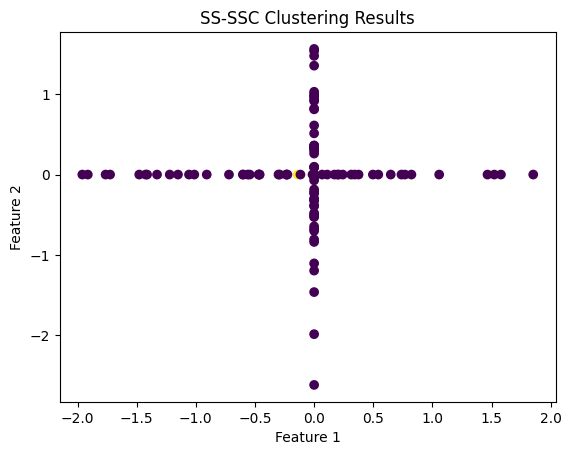

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Synthetic data generation
np.random.seed(42)

# Two 1-dimensional subspaces in a 2-dimensional space
n_samples_per_subspace = 50
subspace1 = np.array([[1], [0]])
subspace2 = np.array([[0], [1]])

X1 = subspace1 @ np.random.normal(size=(1, n_samples_per_subspace))
X2 = subspace2 @ np.random.normal(size=(1, n_samples_per_subspace))
X = np.hstack((X1, X2))

# Apply SS-SSC
n_clusters = 2
cluster_assignments = ss_ssc(X, n_clusters)

# Visualize results
plt.scatter(X[0, :], X[1, :], c=cluster_assignments, cmap='viridis', marker='o')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SS-SSC Clustering Results')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


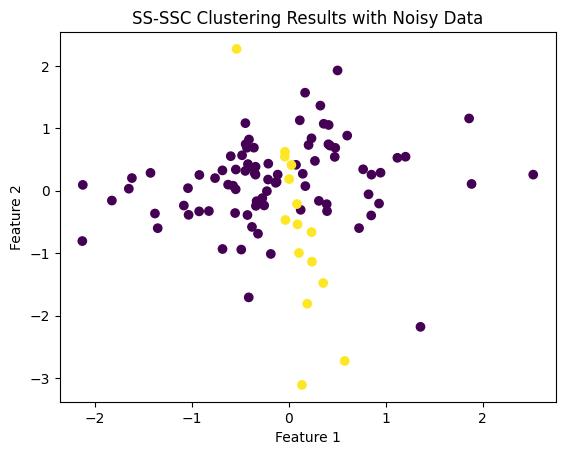

In [28]:
# Add noise to the data
noise_level = 0.5
X_noisy = X + noise_level * np.random.randn(*X.shape)

# Apply SS-SSC
cluster_assignments_noisy = ss_ssc(X_noisy, n_clusters)

# Visualize results
plt.scatter(X_noisy[0, :], X_noisy[1, :], c=cluster_assignments_noisy, cmap='viridis', marker='o')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SS-SSC Clustering Results with Noisy Data')
plt.show()


In [6]:
from sklearn.linear_model import ElasticNet

def compute_sparse_representation_elastic_net(X, alpha, l1_ratio):
    n_samples = X.shape[1]
    A = np.zeros((n_samples, n_samples))
    
    for i in range(n_samples):
        x_i = X[:, i]
        X_rest = np.delete(X, i, axis=1)
        elastic_net = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, fit_intercept=False)
        elastic_net.fit(X_rest, x_i)
        coeffs = elastic_net.coef_
        A[np.arange(n_samples) != i, i] = coeffs

    return A

# Modify the main function to use the new sparse representation computation method
def ss_ssc_elastic_net(X, n_clusters, alpha=1e-4, l1_ratio=0.5, k=2):
    X = normalize_columns(X)
    A = compute_sparse_representation_elastic_net(X, alpha, l1_ratio)
    A = np.abs(A) + np.abs(A.T)

    if k is not None:
        for i in range(A.shape[0]):
            idx = np.argsort(A[i, :])[:-k - 1:-1]
           


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.157e-04, tolerance: 1.000e-04
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.186e-04, tolerance: 1.000e-04
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.019e-04, tolerance: 1.000e

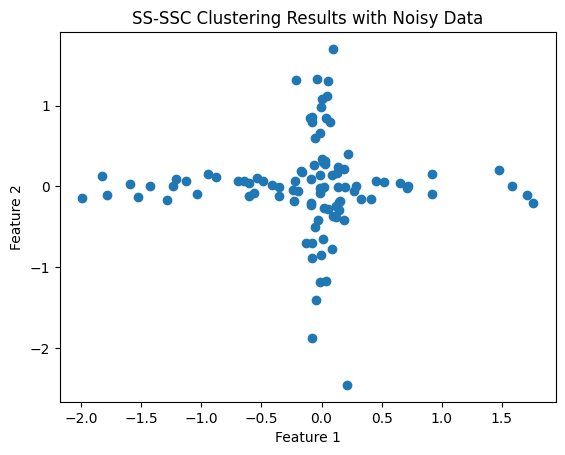

In [29]:
# Add noise to the data
noise_level = 0.1
X_noisy = X + noise_level * np.random.randn(*X.shape)

# Apply SS-SSC
cluster_assignments_noisy = ss_ssc_elastic_net(X_noisy, n_clusters)

# Visualize results
plt.scatter(X_noisy[0, :], X_noisy[1, :], c=cluster_assignments_noisy, cmap='viridis', marker='o')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SS-SSC Clustering Results with Noisy Data')
plt.show()


In [30]:
from sklearn import datasets

# Load the Iris dataset
iris = datasets.load_iris()
X_iris = iris.data.T

# Apply SS-SSC
n_clusters_iris = len(np.unique(iris.target))
cluster_assignments_iris = ss_ssc(X_iris, n_clusters_iris)

# Evaluate clustering performance
from sklearn.metrics import adjusted_rand_score
ari_iris = adjusted_rand_score(iris.target, cluster_assignments_iris)
print(f"Adjusted Rand Index (ARI) for initial SS-SSC on Iris dataset: {ari_iris:.4f}")


Adjusted Rand Index (ARI) for initial SS-SSC on Iris dataset: 0.0002


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [31]:
from sklearn.decomposition import PCA

# Perform PCA on the Iris dataset
pca = PCA(n_components=2)
X_iris_pca = pca.fit_transform(iris.data).T

# Apply SS-SSC on the reduced dataset
cluster_assignments_iris_pca = ss_ssc(X_iris_pca, n_clusters_iris)

# Evaluate clustering performance
ari_iris_pca = adjusted_rand_score(iris.target, cluster_assignments_iris_pca)
print(f"Adjusted Rand Index (ARI) for modified SS-SSC on Iris dataset after PCA: {ari_iris_pca:.4f}")


Adjusted Rand Index (ARI) for modified SS-SSC on Iris dataset after PCA: -0.0001


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
from sklearn.datasets import make_blobs

# Create a synthetic high-dimensional dataset with well-separated subspaces
n_features = 500
n_samples_per_cluster = 10000
n_clusters_synthetic = 3
X_synthetic, y_synthetic = make_blobs(n_samples=n_samples_per_cluster * n_clusters_synthetic,
                                      n_features=n_features, centers=n_clusters_synthetic, random_state=42)
X_synthetic = X_synthetic.T

# Apply initial SS-SSC
cluster_assignments_synthetic = ss_ssc(X_synthetic, n_clusters_synthetic)
ari_synthetic = adjusted_rand_score(y_synthetic, cluster_assignments_synthetic)
print(f"Adjusted Rand Index (ARI) for initial SS-SSC on synthetic dataset: {ari_synthetic:.4f}")

# Apply PCA and then SS-SSC
pca_synthetic = PCA(n_components=5)
X_synthetic_pca = pca_synthetic.fit_transform(X_synthetic.T).T
cluster_assignments_synthetic_pca = ss_ssc(X_synthetic_pca, n_clusters_synthetic)
ari_synthetic_pca = adjusted_rand_score(y_synthetic, cluster_assignments_synthetic_pca)
print(f"Adjusted Rand Index (ARI) for modified SS-SSC on synthetic dataset after PCA: {ari_synthetic_pca:.4f}")
